<a href="https://colab.research.google.com/github/Mbwas-Ayuba/AI-/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4

# Instructions:
Train an AI model to predict Classes in the Raisin Variety Classification Dataset.

1. Use Logistics Regression
2. Dataset Split 80:20
3. Use 5-Fold Cross-Validation
4. Make sure you achieve at least 81% accuracy on the test sample.

Using either MATLAB Classification Learner OR Google Colab.

Commit your work to your GitHub Repository

Submit the link to your GitHub Repository


# Brief info about the raisin dataset
The Raisin Dataset is a classification dataset designed to distinguish between two raisin varieties, Kecimen and Besni, using morphological features. It contains 900 instances, with 450 samples from each variety, and includes 7 features extracted from images of the raisins.

Dataset Features

The dataset includes the following features:

**Area:** *The number of pixels within the raisin's boundaries.*

**Perimeter:** *The distance around the raisin's boundary.*

**MajorAxisLength:** *The length of the longest line that can be drawn on the raisin.*

**MinorAxisLength:** *The length of the shortest line that can be drawn on the raisin.*

**Eccentricity:** *A measure of how much the raisin's shape deviates from a perfect circle.*

**ConvexArea:** *The number of pixels in the smallest convex shape enclosing the raisin.*

**Extent:** *The ratio of the raisin's area to the bounding box area.*

The target variable is Class, which categorizes the raisin as either Kecimen or Besni.

# Applications

This dataset is commonly used in machine learning tasks, particularly for classification problems. It has been employed in projects using models like Decision Trees and Logistic Regression, with hyperparameter tuning techniques such as Grid Search and Randomized Search to optimize performance.

In [ ]:
#@title Install Pandas library
!pip install pandas
print("Install completed.")

Install completed.


In [ ]:
#@title Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("Imported completed.")

Imported completed.


In [ ]:
#@title Load dataset
df = pd.read_csv("/Raisin_Dataset.csv")

In [ ]:
#@title Preview the dataset
# To preview the first five rows
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
#@title The shape of the dataset
df.shape

(900, 8)

In [ ]:
#@title Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


There are no missing values in the dataset

In [ ]:
#@title Statistical summary of the data
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


### Histograms of numerical features

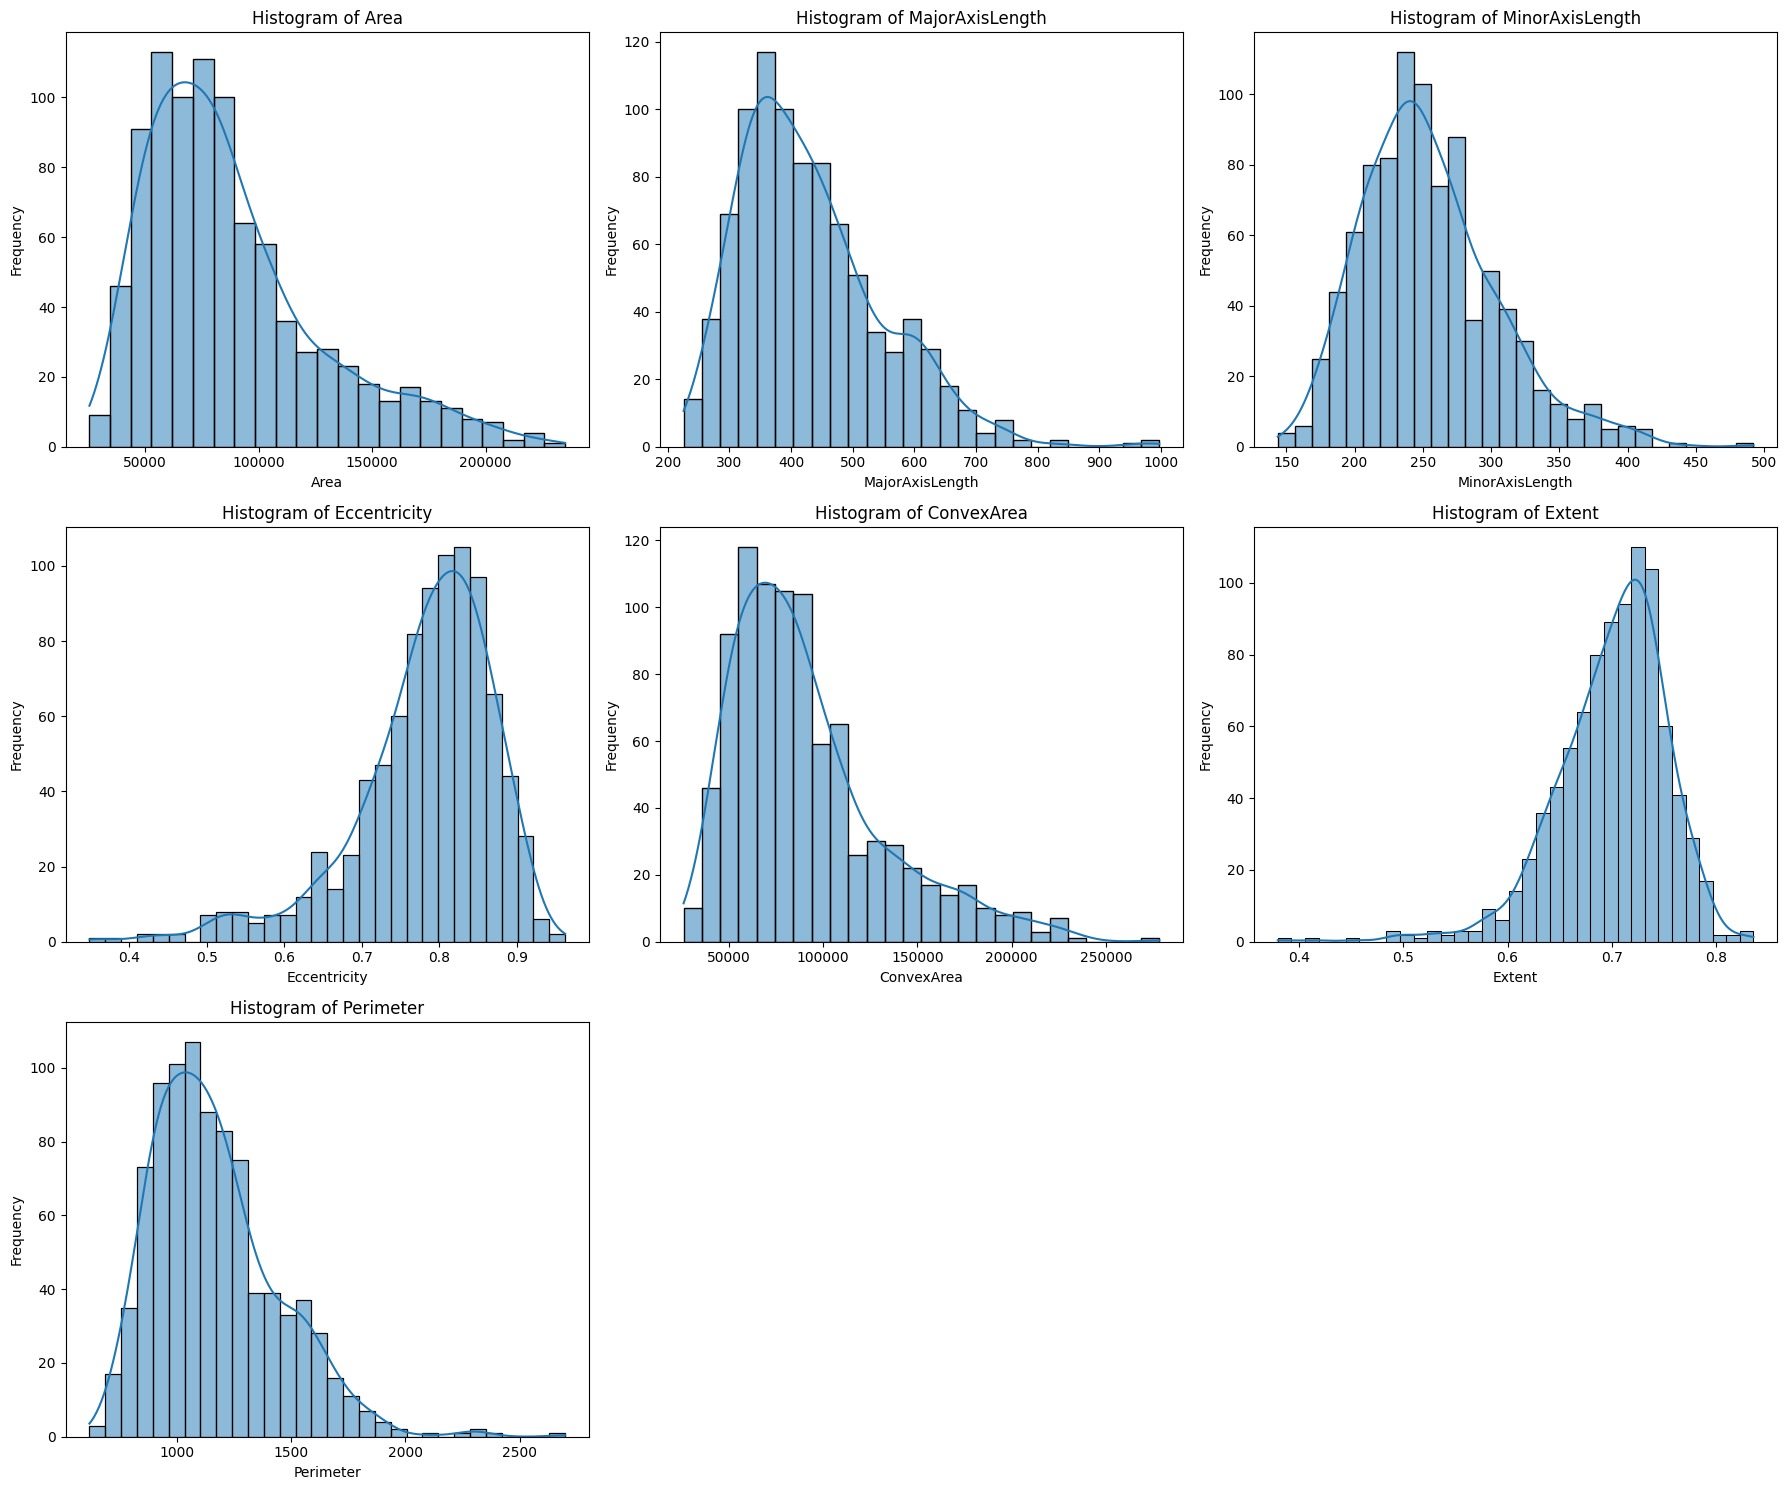

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = len(numerical_cols)
n_cols_per_row = 3  # You can adjust this number
n_rows = (n_cols + n_cols_per_row - 1) // n_cols_per_row

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(n_cols_per_row * 6, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Scatter plots of numerical features

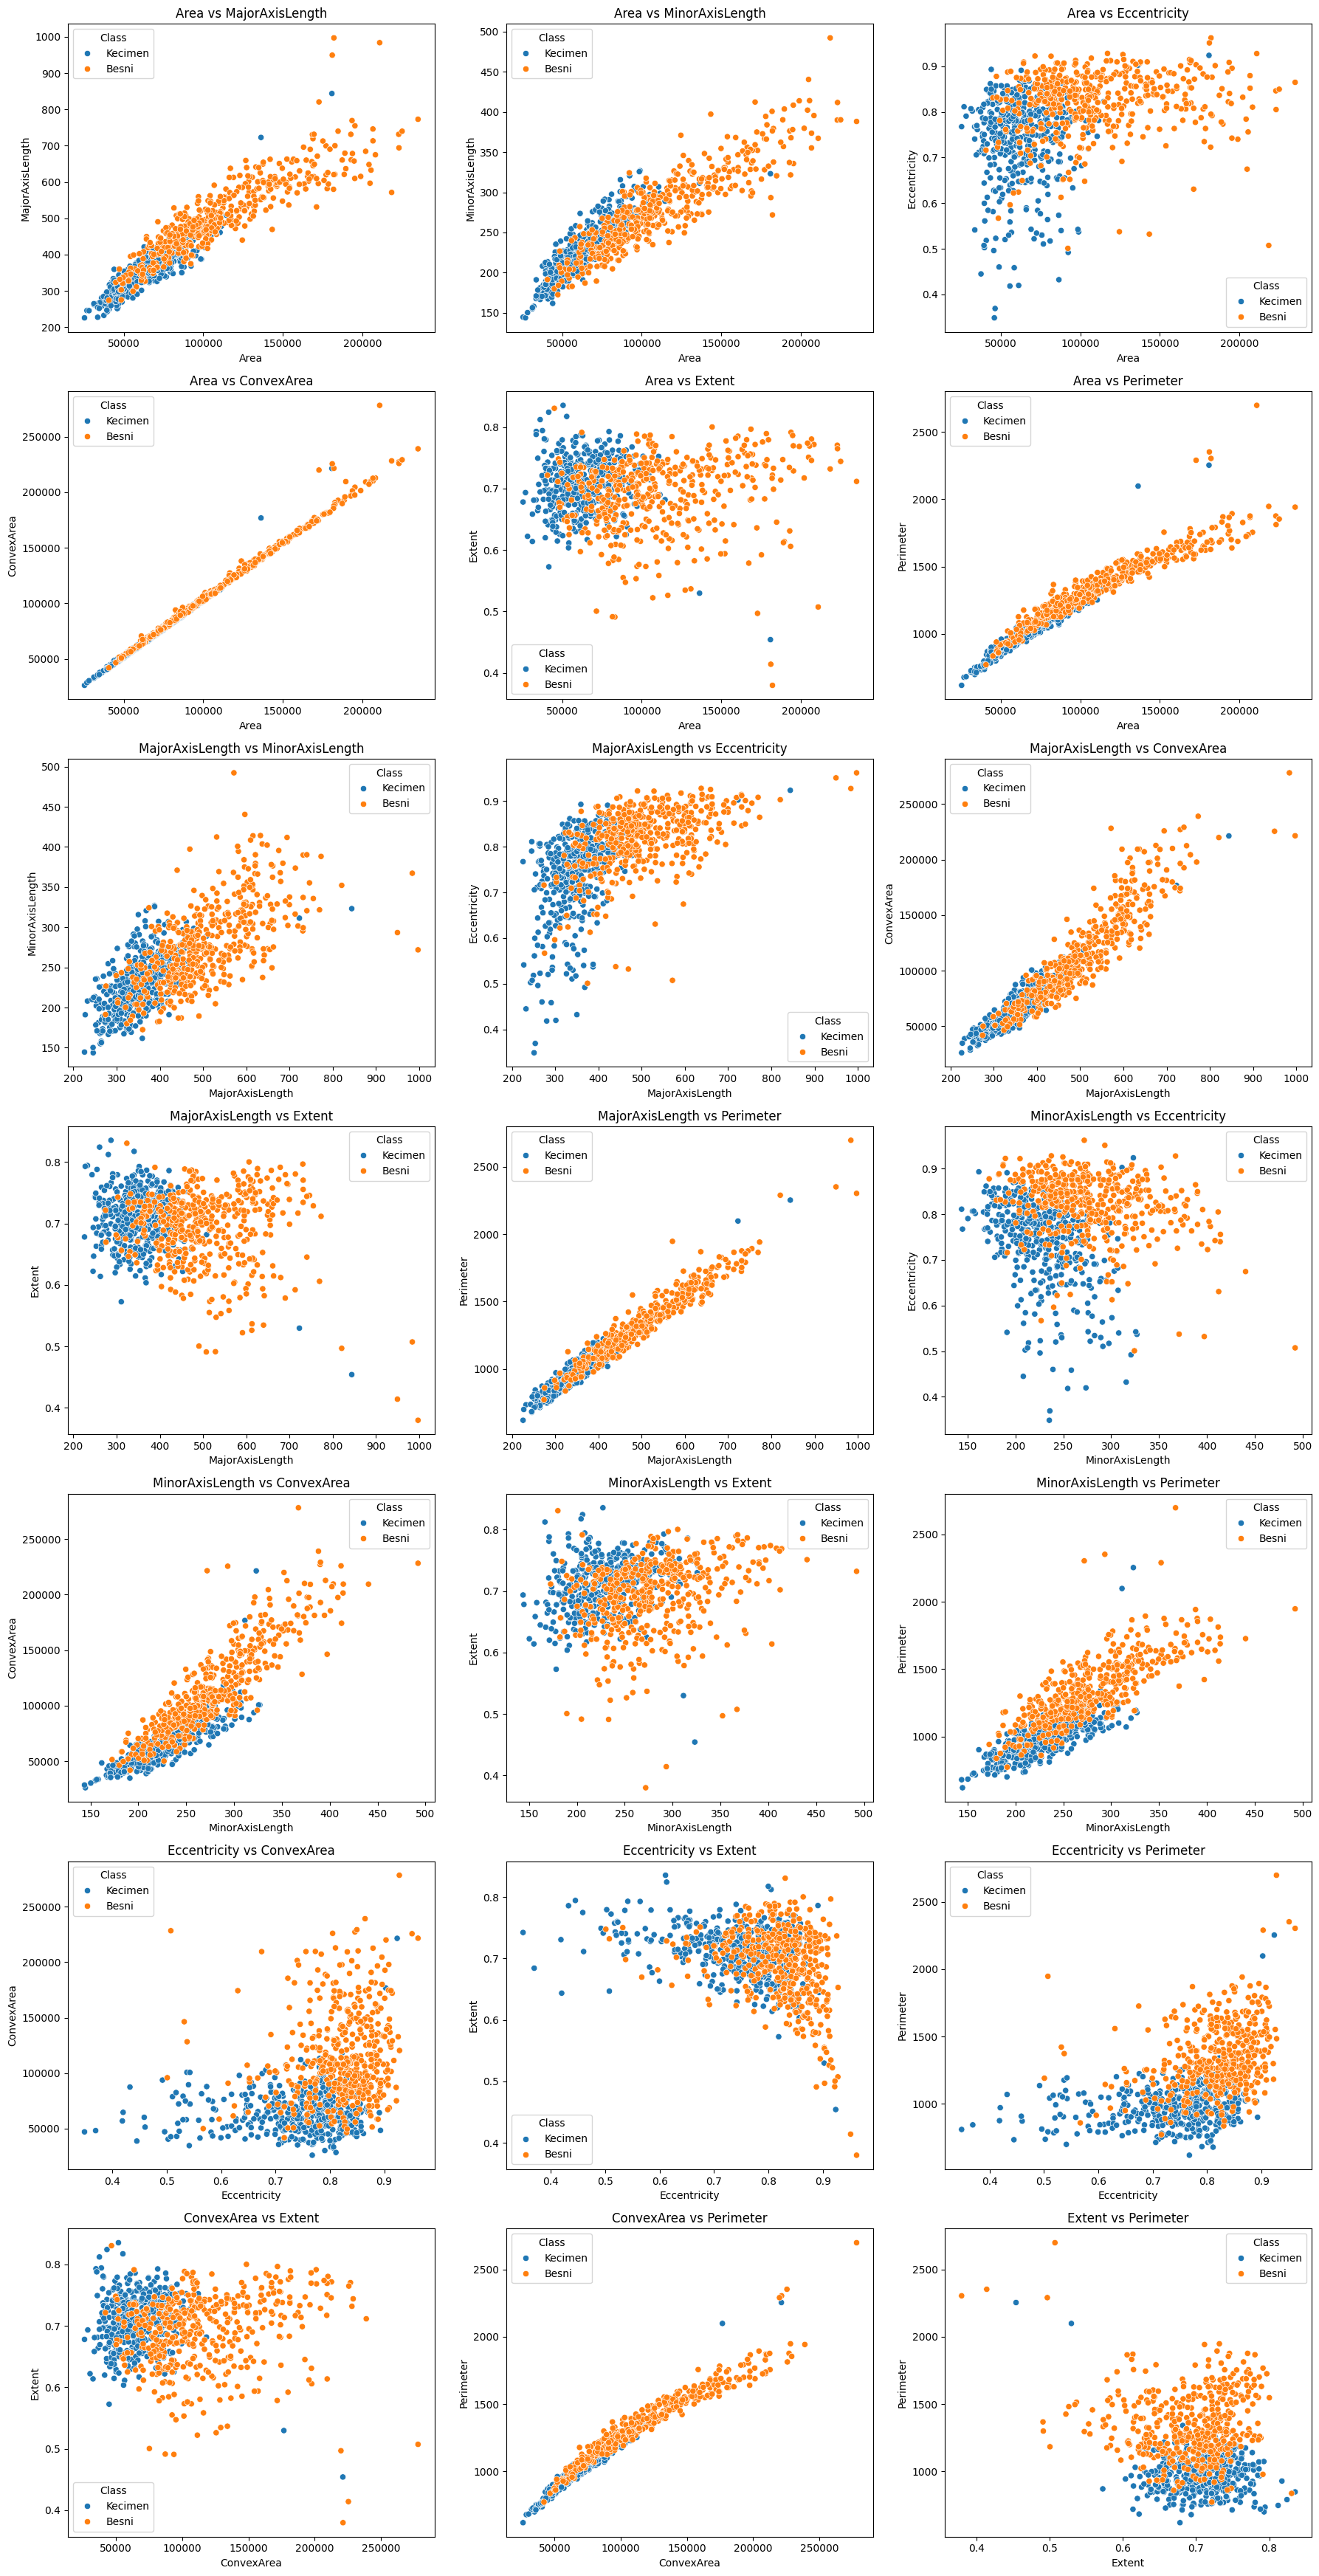

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of subplots needed
n_cols = len(numerical_cols)
n_plots = (n_cols * (n_cols - 1)) // 2
n_cols_per_row = 3 # You can adjust this number
n_rows = (n_plots + n_cols_per_row - 1) // n_cols_per_row

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(n_cols_per_row * 6, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

plot_idx = 0
for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        col1 = numerical_cols[i]
        col2 = numerical_cols[j]
        sns.scatterplot(data=df, x=col1, y=col2, hue='Class', ax=axes[plot_idx])
        axes[plot_idx].set_title(f'{col1} vs {col2}')
        axes[plot_idx].set_xlabel(col1)
        axes[plot_idx].set_ylabel(col2)
        plot_idx += 1

# Hide any unused subplots
for k in range(plot_idx, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

### Box plots of numerical features

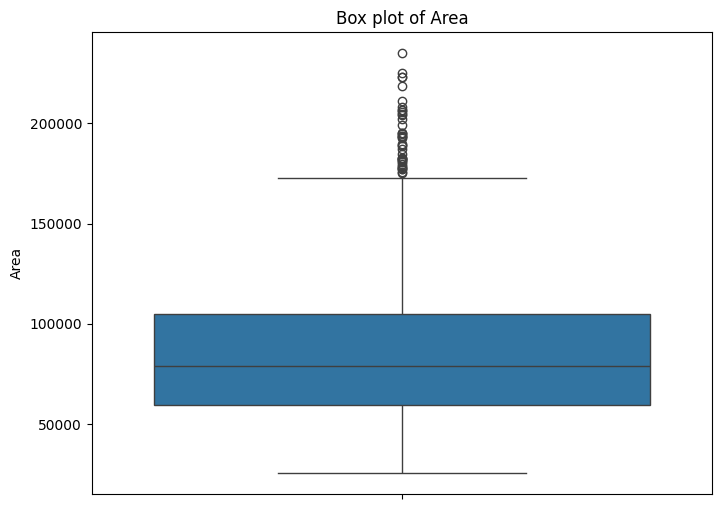

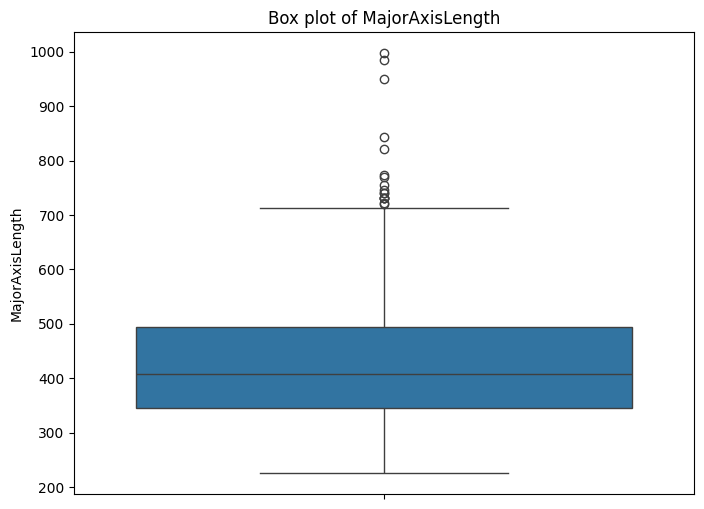

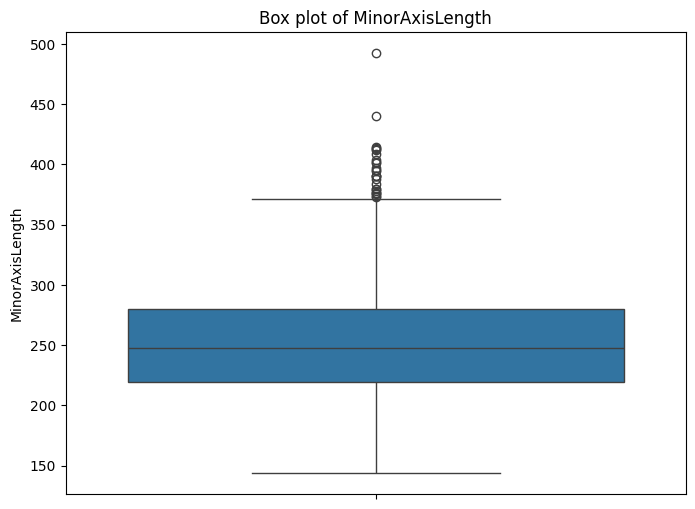

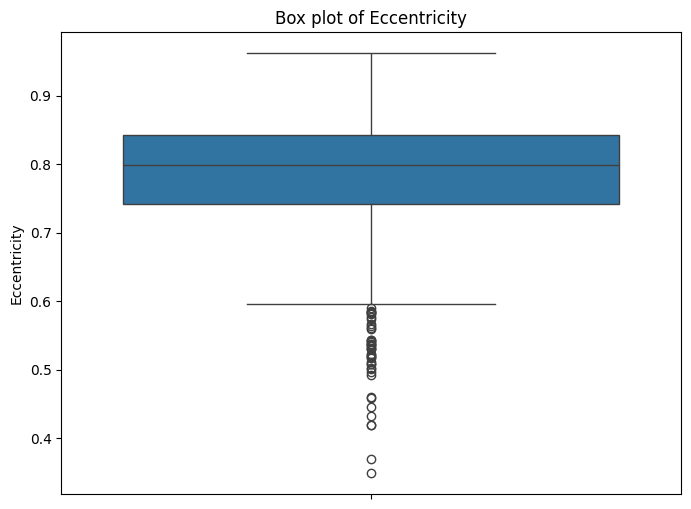

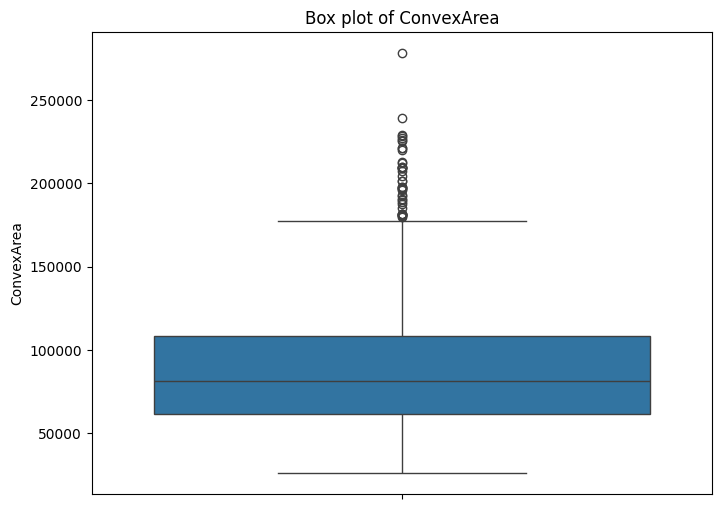

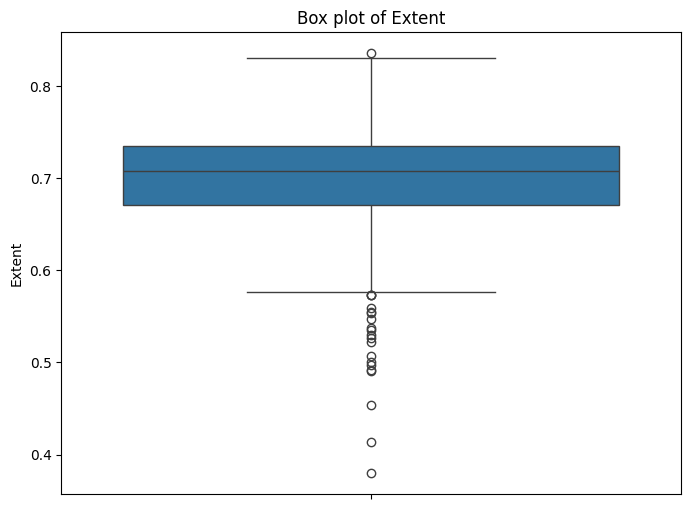

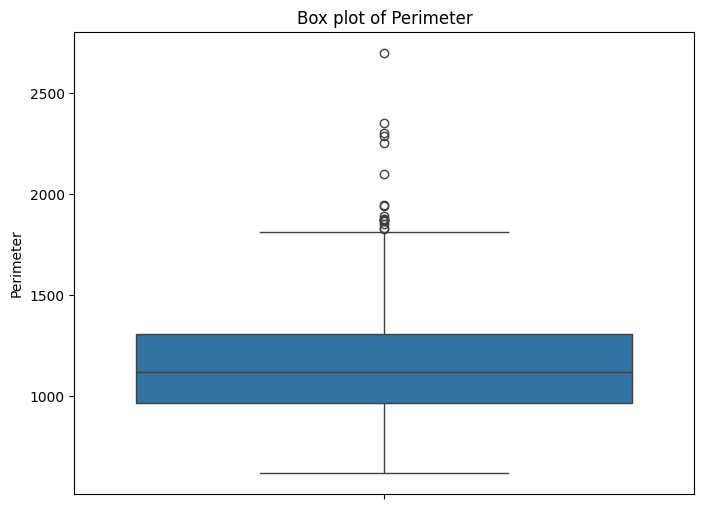

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

In [ ]:
#@title Check Class label
df["Class"].value_counts()

,count
Class,
Kecimen,450
Besni,450


The data appears to be a balance dataset

In [ ]:
#@title Class extraction
classes = {"Kecimen": 0, "Besni": 1}

In [ ]:
#@title Class transformation
df["Class"] = df["Class"].map(classes)

In [ ]:
df["Class"].value_counts()

,count
Class,
0,450
1,450


In [ ]:
#@title Cross-validation
k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=k_folds)


print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validation scores: [0.89583333 0.90277778 0.84722222 0.84722222 0.85416667]
Mean cross-validation accuracy: 0.87 (+/- 0.05)


In [ ]:
#@title Split the dataset
train_dataset,test_dataset = train_test_split(df, test_size = 0.2, random_state = 42)
X_train = train_dataset.drop("Class", axis = 1)
y_train = train_dataset["Class"]
X_test = test_dataset.drop("Class", axis = 1)
y_test = test_dataset["Class"]

In [ ]:
#@title Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#@title Model defined
model = LogisticRegression()

In [ ]:
#@title Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#@title Test model
y_pred = model.predict(X_test)

In [ ]:
#@title Evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8555555555555555


In [ ]:
#@title Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[79 15]
 [11 75]]


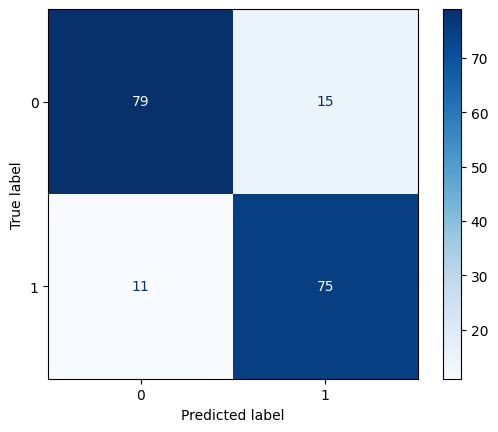

In [ ]:
#@title Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()